In [2]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
#import xgboost

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape, df_test.shape)

(51000, 29) (23111, 28)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 29 columns):
id                        51000 non-null int64
log_price                 51000 non-null float64
property_type             51000 non-null object
room_type                 51000 non-null object
amenities                 51000 non-null object
accommodates              51000 non-null int64
bathrooms                 50867 non-null float64
bed_type                  51000 non-null object
cancellation_policy       51000 non-null object
cleaning_fee              51000 non-null bool
city                      51000 non-null object
description               51000 non-null object
first_review              40144 non-null object
host_has_profile_pic      50873 non-null object
host_identity_verified    50873 non-null object
host_response_rate        38449 non-null object
host_since                50873 non-null object
instant_bookable          51000 non-null object
last_review               401

In [5]:
np.max(df_train['log_price'])

7.6004023345004

In [6]:
np.min(df_train['log_price'])

0.0

In [7]:
np.mean(df_train['log_price'])

4.778692813471993

In [8]:
np.median(df_train['log_price'])

4.700480365792417

count    51000.0
mean         5.0
std          1.0
min          0.0
25%          4.0
50%          5.0
75%          5.0
max          8.0
Name: log_price, dtype: float64


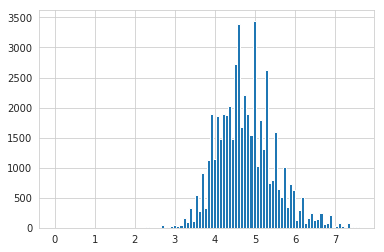

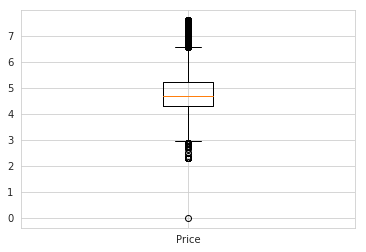

In [9]:
# Analize pricing distribution

# Histogram
print(df_train['log_price'].describe().round())
plt.hist(df_train['log_price'], bins=100)
plt.show()
# Box plot
plt.boxplot(df_train['log_price'])
plt.xticks([1], ['Price'], rotation='horizontal')
plt.show()

In [10]:
print(df_train.columns)
df_train.head()

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,41.849684,-87.676270,Pilsen Arts Community Custom Home,Pilsen,17,97.0,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.0,1.0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,34.068613,-118.246455,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.0,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.0,1.0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.701958,-73.917352,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.0,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.0,3.0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,40.742959,-73.990820,Grande Super Large APT !!!,Flatiron District,12,82.0,NaN,10010,1.0,3.0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,34.046473,-117.734095,Private Cozy and Clean Rooms in Pomona,NaN,2,100.0,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.0,1.0


In [11]:
df_room_type = pd.get_dummies(df_train[['room_type', 'property_type']])
# df_train = pd.concat([df_train, df_room_type], axis=1).fillna(0.0)
print(list(df_room_type.columns))
df_train.head()

['room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'property_type_Apartment', 'property_type_Bed & Breakfast', 'property_type_Boat', 'property_type_Boutique hotel', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV', 'property_type_Castle', 'property_type_Cave', 'property_type_Chalet', 'property_type_Condominium', 'property_type_Dorm', 'property_type_Earth House', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_Hostel', 'property_type_House', 'property_type_Hut', 'property_type_In-law', 'property_type_Island', 'property_type_Lighthouse', 'property_type_Loft', 'property_type_Other', 'property_type_Serviced apartment', 'property_type_Tent', 'property_type_Timeshare', 'property_type_Tipi', 'property_type_Townhouse', 'property_type_Train', 'property_type_Treehouse', 'property_type_Vacation home', 'property_type_Villa', 'property_type_Yurt']


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,41.849684,-87.676270,Pilsen Arts Community Custom Home,Pilsen,17,97.0,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.0,1.0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,34.068613,-118.246455,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.0,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.0,1.0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.701958,-73.917352,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.0,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.0,3.0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,40.742959,-73.990820,Grande Super Large APT !!!,Flatiron District,12,82.0,NaN,10010,1.0,3.0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,34.046473,-117.734095,Private Cozy and Clean Rooms in Pomona,NaN,2,100.0,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.0,1.0


In [12]:
df_room_type.drop(['property_type_Cave', 'property_type_Earth House', 'property_type_Island', 'property_type_Lighthouse'], axis=1, inplace=True)
df_train = pd.concat([df_train, df_room_type], axis=1).fillna(0.0)
print(list(df_train.columns))
df_train.head()

['id', 'log_price', 'property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'property_type_Apartment', 'property_type_Bed & Breakfast', 'property_type_Boat', 'property_type_Boutique hotel', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV', 'property_type_Castle', 'property_type_Chalet', 'property_type_Condominium', 'property_type_Dorm', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_Hostel', 'property_type_House', 'property_type_Hut', 'property_type_In-law', 'property_type_Loft', 'property_type

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,0,0,0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,0,0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_room_type_test = pd.get_dummies(df_test[['room_type', 'property_type']])
print(list(df_room_type_test.columns))
df_room_type_test.sum()

['room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'property_type_Apartment', 'property_type_Bed & Breakfast', 'property_type_Boat', 'property_type_Boutique hotel', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV', 'property_type_Casa particular', 'property_type_Castle', 'property_type_Chalet', 'property_type_Condominium', 'property_type_Dorm', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_Hostel', 'property_type_House', 'property_type_Hut', 'property_type_In-law', 'property_type_Loft', 'property_type_Other', 'property_type_Parking Space', 'property_type_Serviced apartment', 'property_type_Tent', 'property_type_Timeshare', 'property_type_Tipi', 'property_type_Townhouse', 'property_type_Train', 'property_type_Treehouse', 'property_type_Vacation home', 'property_type_Villa', 'property_type_Yurt']


room_type_Entire home/apt           12943
room_type_Private room               9513
room_type_Shared room                 655
property_type_Apartment             15327
property_type_Bed & Breakfast         153
property_type_Boat                     20
property_type_Boutique hotel           16
property_type_Bungalow                123
property_type_Cabin                    16
property_type_Camper/RV                31
property_type_Casa particular           1
property_type_Castle                    3
property_type_Chalet                    4
property_type_Condominium             846
property_type_Dorm                     43
property_type_Guest suite              40
property_type_Guesthouse              169
property_type_Hostel                   21
property_type_House                  5095
property_type_Hut                       4
property_type_In-law                   24
property_type_Loft                    385
property_type_Other                   189
property_type_Parking Space       

In [14]:
df_room_type_test.drop(['property_type_Casa particular', 'property_type_Parking Space'], axis=1, inplace=True)
df_test = pd.concat([df_test, df_room_type_test], axis=1).fillna(0.0)
print(list(df_test.columns))
df_test.head()

['id', 'property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'property_type_Apartment', 'property_type_Bed & Breakfast', 'property_type_Boat', 'property_type_Boutique hotel', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV', 'property_type_Castle', 'property_type_Chalet', 'property_type_Condominium', 'property_type_Dorm', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_Hostel', 'property_type_House', 'property_type_Hut', 'property_type_In-law', 'property_type_Loft', 'property_type_Other', 'pro

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt
0,986942,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,False,NYC,...,0,0,0,0,0,0,0,0,0,0
1,16436737,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",4,1.5,Real Bed,moderate,True,DC,...,0,0,0,0,0,0,0,0,0,0
2,18209634,Apartment,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",1,1.0,Real Bed,flexible,True,NYC,...,0,0,0,0,0,0,0,0,0,0
3,15027024,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,NYC,...,0,0,0,0,0,0,0,0,0,0
4,18074243,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,Real Bed,strict,True,NYC,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 61 columns):
id                                  51000 non-null int64
log_price                           51000 non-null float64
property_type                       51000 non-null object
room_type                           51000 non-null object
amenities                           51000 non-null object
accommodates                        51000 non-null int64
bathrooms                           51000 non-null float64
bed_type                            51000 non-null object
cancellation_policy                 51000 non-null object
cleaning_fee                        51000 non-null bool
city                                51000 non-null object
description                         51000 non-null object
first_review                        51000 non-null object
host_has_profile_pic                51000 non-null object
host_identity_verified              51000 non-null object
host_response_rate     

In [16]:
df_city_train = pd.get_dummies(df_train['city'])

In [17]:
df_train = pd.concat([df_train, df_city_train], axis=1).fillna(0.0)

In [18]:
df_train.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,Boston,Chicago,DC,LA,NYC,SF
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,0,0,0,0,0,1,0,0,0,0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,1,0,0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,0,0,0,0,0,0,0,0,1,0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,0,0,0,0,0,0,0,0,1,0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,0,0,0,0,0,0,0,1,0,0


In [19]:
df_city_test = pd.get_dummies(df_test['city'])

In [20]:
df_test = pd.concat([df_test, df_city_test], axis=1).fillna(0.0)

In [21]:
df_test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,Boston,Chicago,DC,LA,NYC,SF
0,986942,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,False,NYC,...,0,0,0,0,0,0,0,0,1,0
1,16436737,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",4,1.5,Real Bed,moderate,True,DC,...,0,0,0,0,0,0,1,0,0,0
2,18209634,Apartment,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",1,1.0,Real Bed,flexible,True,NYC,...,0,0,0,0,0,0,0,0,1,0
3,15027024,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,NYC,...,0,0,0,0,0,0,0,0,1,0
4,18074243,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,Real Bed,strict,True,NYC,...,0,0,0,0,0,0,0,0,1,0


In [22]:
#Bad idea
#df_train['log_price'] = df_train['log_price'].apply(lambda x: 7 if x > 7 else x)

In [23]:
#df_train['log_price'] = df_train['log_price'].apply(lambda x: 2 if x < 2 else x)

In [24]:
X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'Boston', 'Chicago', 'DC', 'LA' ,'NYC', 'SF', 'latitude', 'longitude'] + list(df_room_type)
y_column = ['log_price']

In [25]:
# handle missing values
df_train = df_train[X_columns + y_column]
print(df_train.shape)
df_train = df_train.fillna(0.0) # probably not a good idea for 'review_scores_rating'
print(df_train.shape)

(51000, 46)
(51000, 46)


In [26]:
threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40800, 45)
y_train (40800, 1)
X_test (10200, 45)
y_test (10200, 1)


In [27]:
#train a linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

RMSE 0.47


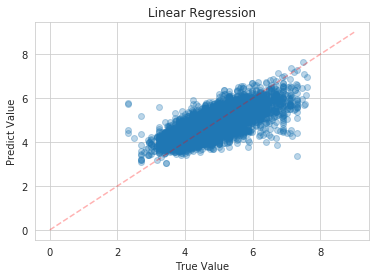

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE', round(rmse, 2))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

In [29]:
# Model Training
model = KNeighborsRegressor(n_neighbors=20)
#model.fit(X_train, y_train.ravel())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
def evaluation_chart(test, pred, title):
    plt.scatter(test, pred, alpha=0.3)
    plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
    plt.title(title)
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([0, 5000000])
    plt.ylim([0, 5000000])
    plt.show()

MAE 0.339
RMSE 0.4593


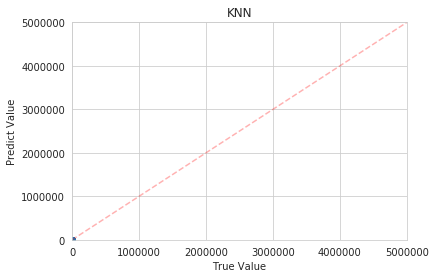

In [31]:
# model evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('MAE', round(mae, 4))
print('RMSE', round(rmse, 4))
evaluation_chart(y_test, y_pred, 'KNN')

In [32]:
def model_training(model, X_train, y_train, X_test):
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    return(y_pred)

def model_evaluation(title, model, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MAE', round(mae, 4))
    print('RMSE', round(rmse, 4))
    for i in range(len(X_columns)):
        print([X_columns[i], model.feature_importances_[i]])
    evaluation_chart(y_test, y_pred, title)

def run_experiment(title, model, X_train, y_train, X_test, y_test):
    y_pred = model_training(model, X_train, y_train, X_test)
    model_evaluation(title, model, y_test, y_pred)

MAE 0.3991
RMSE 0.5578
['accommodates', 0.03965831451884048]
['bathrooms', 0.1259759538760277]
['bedrooms', 0.026815823976572773]
['beds', 0.01396218571399905]
['review_scores_rating', 0.04669003659238992]
['Boston', 6.66012471731559e-05]
['Chicago', 0.0009849691976497462]
['DC', 0.006917433135473136]
['LA', 3.316495102251733e-05]
['NYC', 0.00021208336290536235]
['SF', 0.0001581341502359985]
['latitude', 0.16923178092089847]
['longitude', 0.16925352809849303]
['room_type_Entire home/apt', 0.363155938268479]
['room_type_Private room', 0.010737902589079747]
['room_type_Shared room', 0.0]
['property_type_Apartment', 0.007384025182030091]
['property_type_Bed & Breakfast', 0.0008084196116082017]
['property_type_Boat', 0.00017878547664326898]
['property_type_Boutique hotel', 3.447812681166936e-05]
['property_type_Bungalow', 0.00023551964049317394]
['property_type_Cabin', 6.441843176718373e-05]
['property_type_Camper/RV', 0.0002855221241218876]
['property_type_Castle', 4.944296194166608e-05]


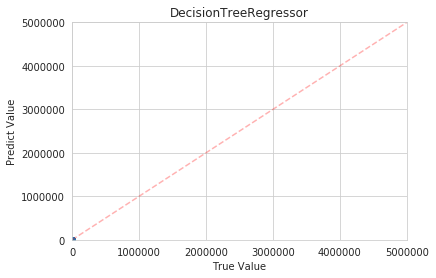

In [33]:
run_experiment('DecisionTreeRegressor', DecisionTreeRegressor(), X_train, y_train, X_test, y_test)

MAE 0.3103
RMSE 0.4321
['accommodates', 0.04027090709889845]
['bathrooms', 0.12419732171084445]
['bedrooms', 0.02839266610084823]
['beds', 0.01405648502478988]
['review_scores_rating', 0.0478325750048768]
['Boston', 5.5960520766716526e-05]
['Chicago', 0.002111163393521064]
['DC', 0.005340250281504196]
['LA', 0.00019581492446890184]
['NYC', 0.0004279841038963966]
['SF', 6.119585561706204e-05]
['latitude', 0.16404869206008096]
['longitude', 0.17095572021168154]
['room_type_Entire home/apt', 0.3641936266997833]
['room_type_Private room', 0.010219222659472529]
['room_type_Shared room', 0.0002392544632966173]
['property_type_Apartment', 0.00698312160101828]
['property_type_Bed & Breakfast', 0.0009267928909137276]
['property_type_Boat', 0.0002824519035022959]
['property_type_Boutique hotel', 0.00027962626322866857]
['property_type_Bungalow', 0.00036850155103254953]
['property_type_Cabin', 8.957141507989927e-05]
['property_type_Camper/RV', 0.0004377547734879656]
['property_type_Castle', 9.216

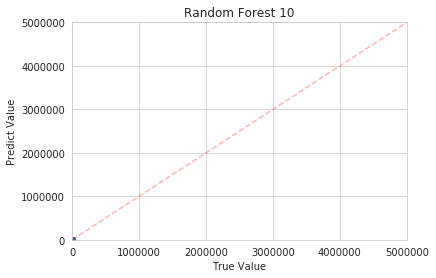

In [34]:
run_experiment('Random Forest 10', RandomForestRegressor(n_estimators=10), X_train, y_train, X_test, y_test)

MAE 0.2977
RMSE 0.4156
['accommodates', 0.04046390395552867]
['bathrooms', 0.12453161811533783]
['bedrooms', 0.02884581838169826]
['beds', 0.013732193313149241]
['review_scores_rating', 0.047816035988918495]
['Boston', 8.061321343241606e-05]
['Chicago', 0.0018306826180677716]
['DC', 0.006983588514858855]
['LA', 0.00019364969986366355]
['NYC', 0.0005369251169475277]
['SF', 9.489442614850428e-05]
['latitude', 0.16165763419703313]
['longitude', 0.17195121306828823]
['room_type_Entire home/apt', 0.36278556340926144]
['room_type_Private room', 0.008247036211246834]
['room_type_Shared room', 0.002896026798647026]
['property_type_Apartment', 0.006953997459808656]
['property_type_Bed & Breakfast', 0.0008557708897940914]
['property_type_Boat', 0.00021776492579447316]
['property_type_Boutique hotel', 0.00029560268224553633]
['property_type_Bungalow', 0.00028215049474178633]
['property_type_Cabin', 8.090180486092459e-05]
['property_type_Camper/RV', 0.000375099817737112]
['property_type_Castle', 8

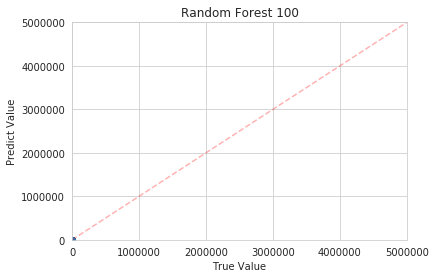

In [35]:
run_experiment('Random Forest 100', RandomForestRegressor(n_estimators=100), X_train, y_train, X_test, y_test)

In [36]:
df_prediction = df_test[X_columns].fillna(0.0)
df_test['log_price'] = model.predict(df_prediction)
df_test[['id', 'log_price']]

,id,log_price
0,986942,4.203381
1,16436737,4.551863
2,18209634,4.188070
3,15027024,4.147395
4,18074243,5.477255
5,8446914,5.061088
6,19362916,4.598341
7,16116059,5.720085
8,20912583,4.552677
9,13573101,4.826935


In [37]:
df_test[['id', 'log_price']].to_csv('submission_linear_regression_2.csv', index=False)